In [1]:
import random

from deap import base
from deap import creator
from deap import tools

In [2]:
%matplotlib notebook

In [3]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [4]:
toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_bool", random.randint, 0, 1)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, 50)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [5]:
def evalOneMax(individual):
    return 1000 + sum(individual),

In [6]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxOnePoint)
#toolbox.register("mutate", tools.mutFlipBit, indpb=0)
toolbox.register("select", tools.selTournament, tournsize=2)

In [7]:
def main():
    pop = toolbox.population(n=200)
        # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
        
    # CXPB  is the probability with which two individuals
    #       are crossed
    #
    # MUTPB is the probability for mutating an individual
    CXPB, MUTPB = 1.0, 0.2
    
    # Extracting all the fitnesses of 
    fits = [ind.fitness.values[0] for ind in pop]
    
    # Variable keeping track of the number of generations
    g = 0
    
    # Begin the evolution
    max_fit = []
    while g < 100:
        # A new generation
        g = g + 1
        #print("-- Generation %i --" % g)
        
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
        
        
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        '''
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        '''
                
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
            
        pop[:] = offspring
    
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]
        
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        
        #print("  Min %s" % min(fits))
        #print("  Max %s" % max(fits))
        #print("  Avg %s" % mean)
        #print("  Std %s" % std)
        
        max_fit.append(max(fits)-1000)
        
    return max_fit

<IPython.core.display.Javascript object>


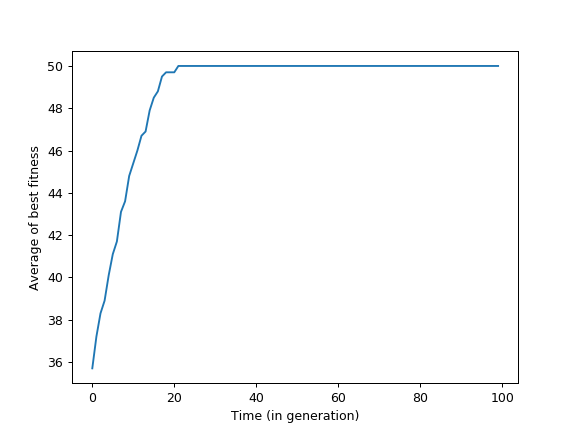

In [8]:
import matplotlib.pyplot as plt

result = []
for run in range(10):
    result.append(main())
    
result = list(sum(x)/10 for x in zip(*result))

plt.plot(list(range(100)), result)
plt.xlabel('Time (in generation)')
plt.ylabel('Average of best fitness')
plt.show()